In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_csv_path ="/kaggle/input/aptos2019-blindness-detection/train.csv"
test_csv_path="/kaggle/input/aptos2019-blindness-detection/test.csv"
train_path="/kaggle/input/aptos2019-blindness-detection/train_images"
test_path="/kaggle/input/aptos2019-blindness-detection/test_images"

In [3]:
train_df=pd.read_csv(train_csv_path, sep=',')

In [4]:
train_df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [5]:
train_df['diagnosis'].value_counts()

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64

In [6]:
train_file=os.listdir(train_path)
test_file=os.listdir(test_path)

In [7]:
print ("Train data count:",len(train_file))
print ("Test data count:",len(test_file))

Train data count: 3662
Test data count: 1928


In [8]:
train_list=[]

for i in train_file[0:20]:
    image =cv2.imread(train_path+'/'+i)
    image =cv2.resize(image,(400,400))
    image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    train_list.append(image)
    

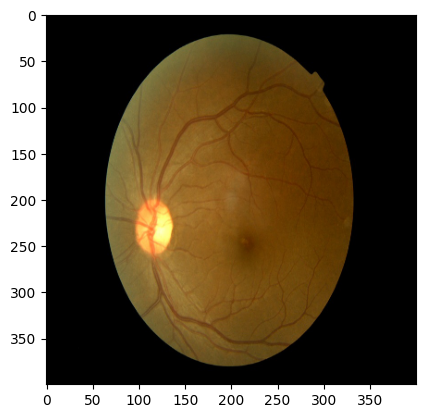

In [9]:
plt.imshow(train_list[0]) 

In [10]:
#Threshold


In [11]:
example = train_list[0].copy()

In [12]:
example =cv2.cvtColor(example,cv2.COLOR_RGB2GRAY)

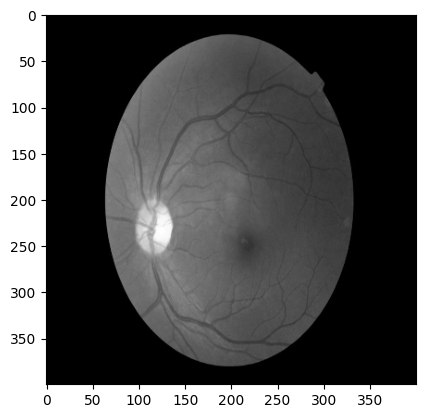

In [13]:
plt.imshow(example, cmap='gray')

In [14]:
example.shape

(400, 400)

In [15]:
#GaussianBlur


In [16]:
blur = cv2.GaussianBlur(example, (5,5),0)

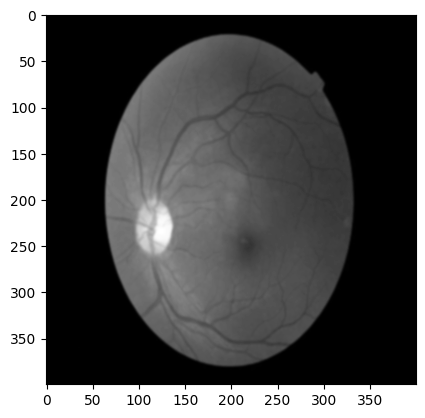

In [17]:
plt.imshow(blur, cmap='gray')

In [18]:
treshold=cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]

HRESH_BINARY
Görüntüdeki piksel, eşik değerinden büyükse maks Değer parametre değerine atanır.

THRESH_BINARY_INV
Görüntüdeki piksel, eşik değerinden küçükse maks Değer parametre değerine atanır.

THRESH_TOZERO
Görüntüdeki piksel, sınır olarak verilen değerden büyükse piksel değeri korunacak, küçükse piksel siyah olarak atanacaktır.

THRESH_TOZERO_INV
Görüntüdeki piksel, sınır olarak verilen değerden küçükse piksel değeri korunacak, büyükse piksel siyah olarak atanacaktır.



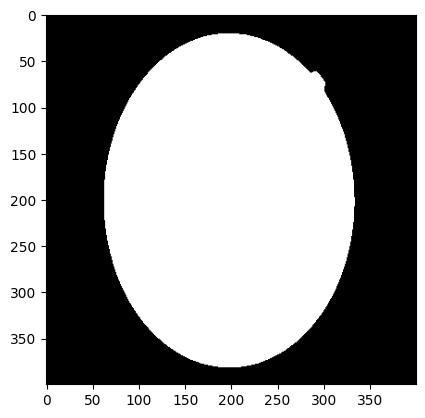

In [19]:
plt.imshow(treshold, cmap='gray')

In [20]:
kontur=cv2.findContours(treshold.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [21]:
kontur

((array([[[186,  21]],
  
         [[185,  22]],
  
         [[179,  22]],
  
         [[178,  23]],
  
         [[174,  23]],
  
         [[173,  24]],
  
         [[170,  24]],
  
         [[169,  25]],
  
         [[167,  25]],
  
         [[166,  26]],
  
         [[164,  26]],
  
         [[163,  27]],
  
         [[161,  27]],
  
         [[160,  28]],
  
         [[159,  28]],
  
         [[158,  29]],
  
         [[156,  29]],
  
         [[155,  30]],
  
         [[154,  30]],
  
         [[153,  31]],
  
         [[152,  31]],
  
         [[151,  32]],
  
         [[150,  32]],
  
         [[149,  33]],
  
         [[148,  33]],
  
         [[147,  34]],
  
         [[146,  34]],
  
         [[145,  35]],
  
         [[144,  35]],
  
         [[142,  37]],
  
         [[141,  37]],
  
         [[140,  38]],
  
         [[139,  38]],
  
         [[137,  40]],
  
         [[136,  40]],
  
         [[134,  42]],
  
         [[133,  42]],
  
         [[130,  45]],
  
         [[1

In [22]:
kontur[0][0]

array([[[186,  21]],

       [[185,  22]],

       [[179,  22]],

       [[178,  23]],

       [[174,  23]],

       [[173,  24]],

       [[170,  24]],

       [[169,  25]],

       [[167,  25]],

       [[166,  26]],

       [[164,  26]],

       [[163,  27]],

       [[161,  27]],

       [[160,  28]],

       [[159,  28]],

       [[158,  29]],

       [[156,  29]],

       [[155,  30]],

       [[154,  30]],

       [[153,  31]],

       [[152,  31]],

       [[151,  32]],

       [[150,  32]],

       [[149,  33]],

       [[148,  33]],

       [[147,  34]],

       [[146,  34]],

       [[145,  35]],

       [[144,  35]],

       [[142,  37]],

       [[141,  37]],

       [[140,  38]],

       [[139,  38]],

       [[137,  40]],

       [[136,  40]],

       [[134,  42]],

       [[133,  42]],

       [[130,  45]],

       [[129,  45]],

       [[124,  50]],

       [[123,  50]],

       [[110,  63]],

       [[110,  64]],

       [[105,  69]],

       [[105,  70]],

       [[1

In [23]:
kontur= kontur[0][0]

In [24]:
kontur.shape

(453, 1, 2)

In [25]:
kontur = kontur[:,0,:]

In [26]:
kontur.shape

(453, 2)

In [27]:
kontur[:,0].argmax()

335

In [28]:
kontur[:,1].argmin()

0

In [29]:
sol = tuple(kontur[kontur[:,0].argmin()])
sağ = tuple(kontur[kontur[:,0].argmax()])
üst = tuple(kontur[kontur[:,1].argmin()])
alt = tuple(kontur[kontur[:,1].argmax()])

In [30]:
sol, sağ, üst, alt

((63, 179), (333, 207), (186, 21), (186, 381))

In [31]:
x1= sol[0]
y1= üst[1]
x2= sağ[0]
y2 = alt[1]

In [32]:
first_img=train_list[0].copy()

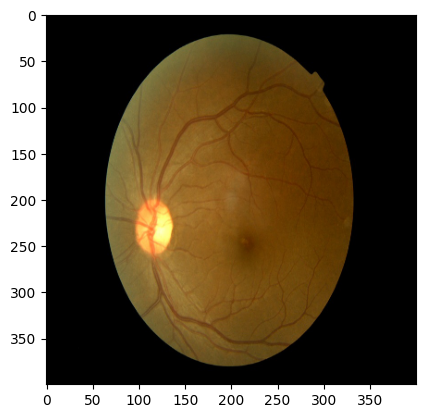

In [33]:
plt.imshow(first_img)

In [34]:
crop_1=first_img[y1:y2, x1:x2]

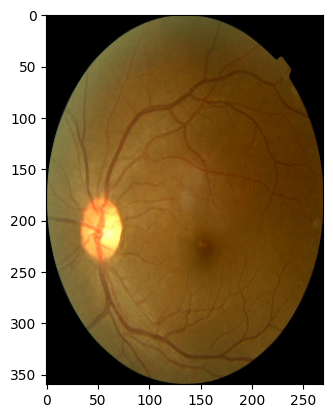

In [35]:
plt.imshow(crop_1)

In [36]:
crop_1.shape

(360, 270, 3)

In [37]:
crop_1=cv2.resize(crop_1,(400,400))

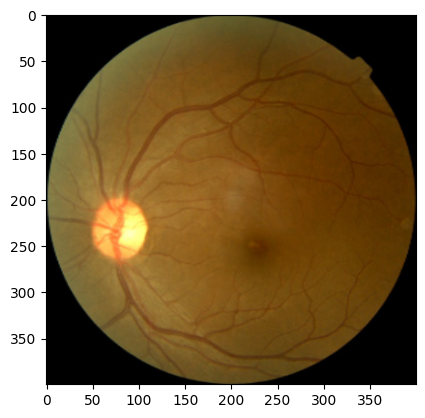

In [38]:
plt.imshow(crop_1)

In [39]:
x= int(x2-x1)*4//100
y= int(y2-y1)*5//400

In [40]:
x,y

(10, 4)

In [41]:
crop_2=first_img[y1+y: y2-y, x1+x:x2-x]

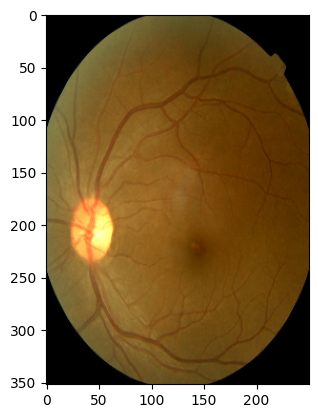

In [42]:
plt.imshow(crop_2)

In [43]:
crop_2=cv2.resize(crop_2,(400,400))

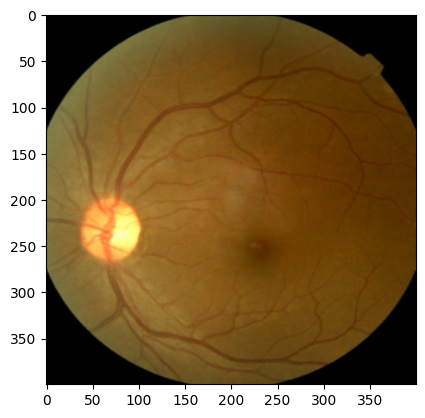

In [44]:
plt.imshow(crop_2)

In [45]:
#CLAHE

Histogram Eşitleme


In [46]:
lab =cv2.cvtColor(crop_2, cv2.COLOR_RGB2LAB)

In [47]:
lab.shape

(400, 400, 3)

In [48]:
l,a,b =cv2.split(lab)

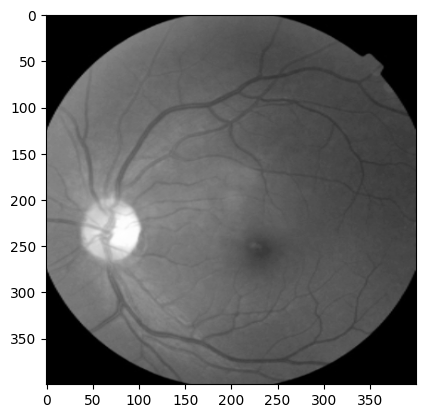

In [49]:
plt.imshow(l,cmap='gray')

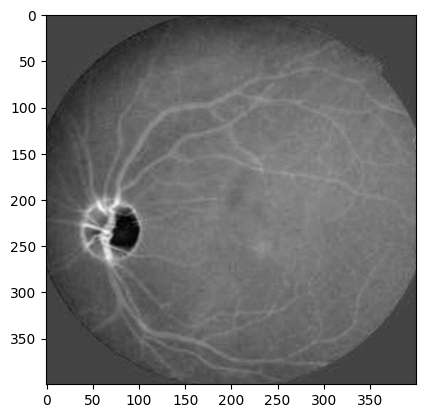

In [50]:
plt.imshow(a,cmap='gray')

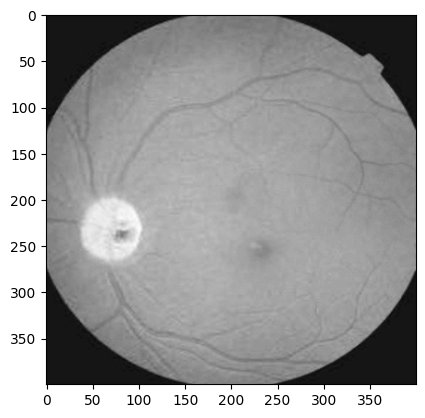

In [51]:
plt.imshow(b,cmap='gray')

In [52]:
flat_l=l.flatten()

In [53]:
flat_l

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

(array([24930.,   222.,   150.,   157.,   216.,  3327., 15382., 19624.,
        25305., 14060., 14631., 18527., 14631.,  4105.,  1003.,   279.,
          342.,   501.,   480.,   515.,   529.,   167.,   154.,   175.,
          588.]),
 array([  0.  ,  10.24,  20.48,  30.72,  40.96,  51.2 ,  61.44,  71.68,
         81.92,  92.16, 102.4 , 112.64, 122.88, 133.12, 143.36, 153.6 ,
        163.84, 174.08, 184.32, 194.56, 204.8 , 215.04, 225.28, 235.52,
        245.76, 256.  ]),
 <BarContainer object of 25 artists>)

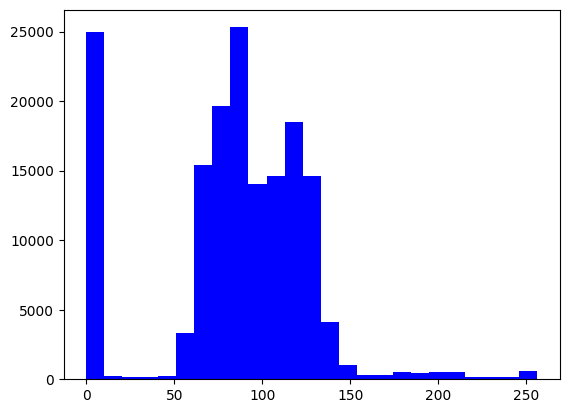

In [54]:
plt.hist(flat_l, 25,[0,256], color='b')

In [55]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8, 8)))
cl= clahe.apply(l)

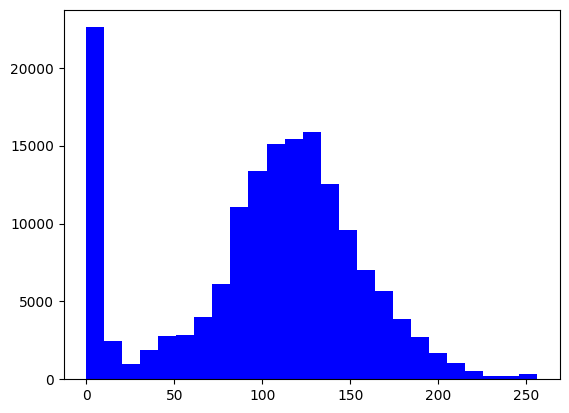

In [56]:
plt.hist(cl.flatten(), 25,[0,256], color='b')
plt.show()

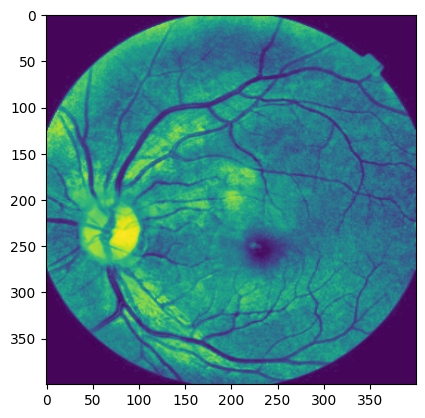

In [57]:
plt.imshow(cl)

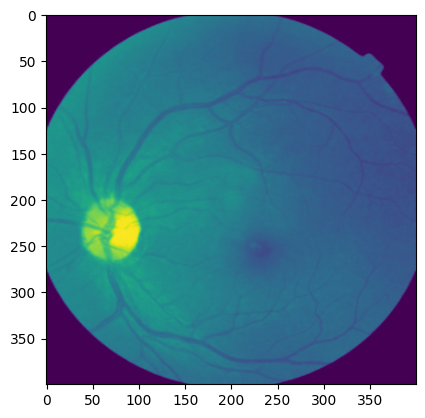

In [58]:
plt.imshow(l)

In [59]:
limg=cv2.merge((cl,a,b))

In [60]:
finally_img=cv2.cvtColor(limg,cv2.COLOR_LAB2LRGB)

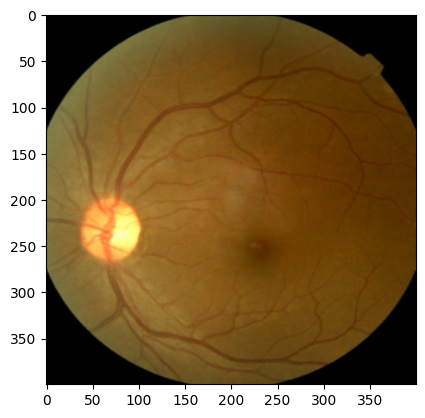

In [61]:
plt.imshow(crop_2)

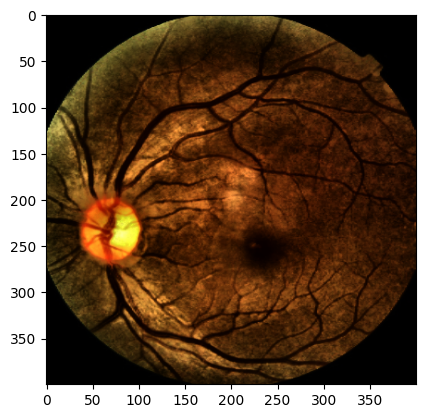

In [62]:
plt.imshow(finally_img)

In [63]:
#MedianBlur --> Kumlamayı düzeltmek için 

In [64]:
med_blur=cv2.medianBlur(finally_img,3)


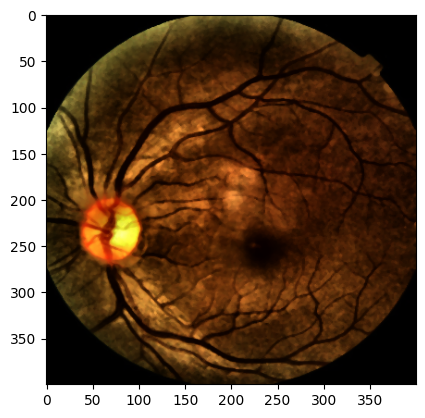

In [65]:
plt.imshow(med_blur)

In [66]:
background=cv2.medianBlur(finally_img, 37)

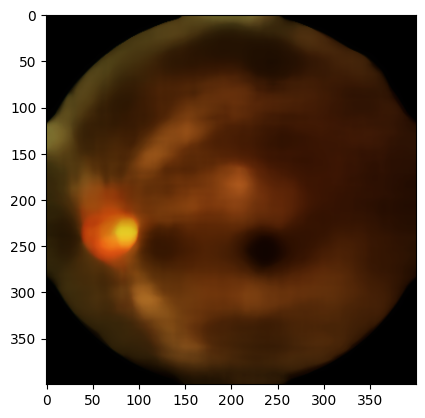

In [67]:
plt.imshow(background)

In [68]:
mask=cv2.addWeighted(med_blur,1,background,-1,255)

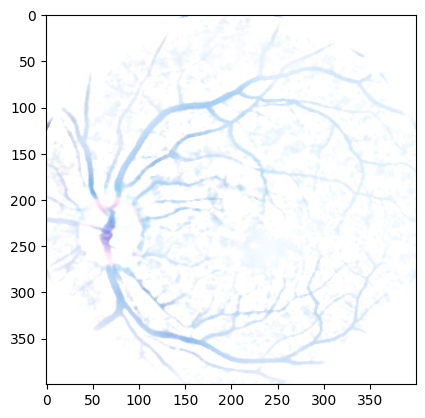

In [69]:
plt.imshow(mask)

In [70]:
finally_img=cv2.bitwise_and(mask,med_blur)

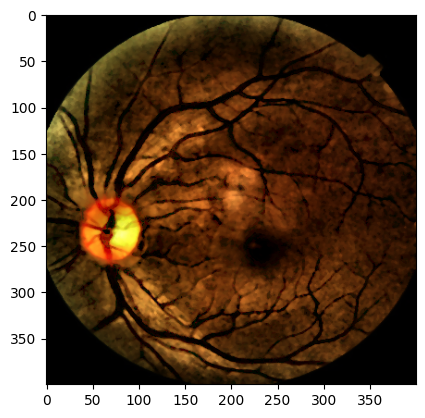

In [71]:
plt.imshow(finally_img)

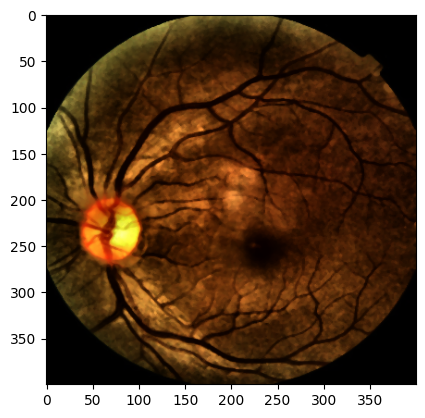

In [72]:
plt.imshow(med_blur)